In [277]:
import numpy as np
import pandas as pd

import importlib
import preprocessing
importlib.reload(preprocessing)

from sklearn import linear_model
model = linear_model.LinearRegression()

import matplotlib.pyplot as plt

data_runs = preprocessing.load_data()
data_runs_concat = pd.concat(data_runs, ignore_index=True)
data_runs_concat.head()
# dir(preprocessing)

,NC1,NC2,NC3,NC4,NC5,BF1,BF2,BF3,BF4,BF5,...,SL5,SL6,SL7,SL8,SL9,SR5,SR6,SR7,SR8,SR9
0,0.986975,0.914239,0.939930,0.981296,0.957198,-0.285199,-0.302871,-0.277568,-0.252033,-0.302303,...,-0.204119,-0.194805,-0.196025,-0.229057,-0.300985,-0.223587,-0.205809,-0.207572,-0.242566,-0.313782
1,0.982099,0.910677,0.936324,0.975822,0.954731,-0.297165,-0.296702,-0.269440,-0.288853,-0.338363,...,-0.203880,-0.196793,-0.195795,-0.234400,-0.298460,-0.223325,-0.204458,-0.208421,-0.240080,-0.320067
2,0.981479,0.912423,0.936251,0.972097,0.950690,-0.289024,-0.295124,-0.274944,-0.282493,-0.310772,...,-0.205548,-0.199560,-0.201897,-0.237236,-0.303589,-0.223848,-0.206127,-0.210116,-0.238507,-0.311953
3,0.984010,0.911266,0.937581,0.978330,0.954849,-0.248833,-0.254865,-0.270877,-0.284804,-0.294314,...,-0.206539,-0.192789,-0.198444,-0.228108,-0.287099,-0.221425,-0.203784,-0.206720,-0.242780,-0.319539
4,0.983990,0.911159,0.938763,0.982019,0.954798,-0.250957,-0.253142,-0.288703,-0.292556,-0.280229,...,-0.206879,-0.192007,-0.193210,-0.228463,-0.297362,-0.222896,-0.201899,-0.203805,-0.236546,-0.308906


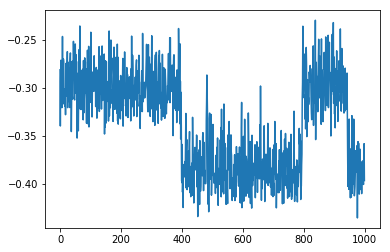

(1000, 39)

In [133]:
# plt.plot(data_runs_concat)
plt.plot(data_runs[0].loc[:, 'BF6'])
# plt.plot(data_runs[0].loc[:, 'BF10'])
plt.show()
data_runs[0].shape

In [348]:
def linear_regression(data, dropped_labels):
    split = (int)(len(data) * .8)
    training_X = data.iloc[:split, :].drop(labels=dropped_labels, axis='columns')
    training_y = data.iloc[:split, :].loc[:, 'BF6']
    testing_X = data.iloc[split:, :].drop(labels=dropped_labels, axis='columns')
    testing_y = data.iloc[split:, :].loc[:, 'BF6']
    model.fit(training_X, training_y)
    print(f'Training score: {model.score(training_X, training_y)}')
    print(f'Testing score: {model.score(testing_X, testing_y)}')
    
    plt.plot(np.arange(split), training_y)
    prediction = model.predict(training_X)
    plt.plot(np.arange(split), prediction)
    plt.show()

    plt.plot(np.arange(len(data) - split), testing_X)
    plt.show()
    
    plt.plot(np.arange(len(data) - split), testing_y)
    prediction = model.predict(testing_X)
    plt.plot(np.arange(len(data) - split), prediction)
    plt.show()

Training score: 0.9479609100556468
Testing score: 0.91120926768618


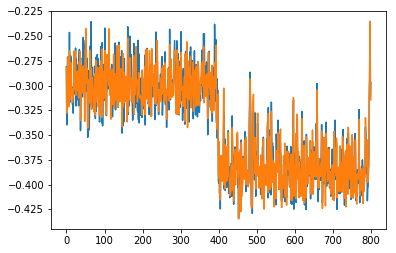

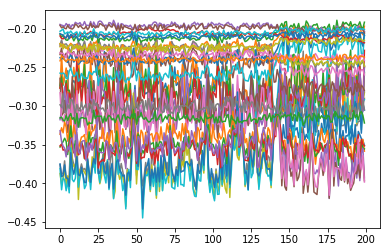

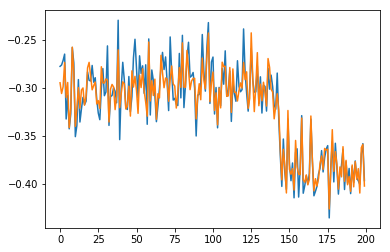

In [333]:
# Predict BF6 using all other ports
linear_regression(data=data_runs[0], dropped_labels='BF6')

Training score: 0.801486588782743
Testing score: 0.6657275895325129


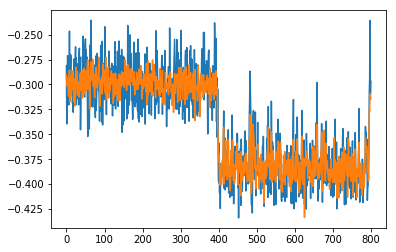

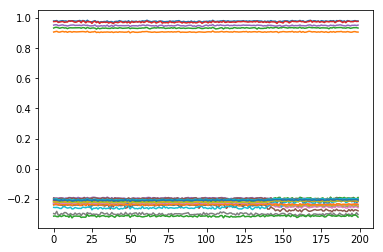

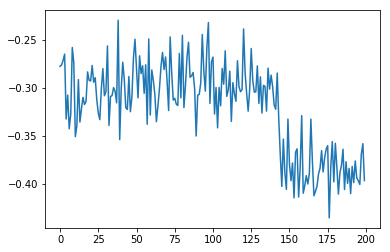

In [349]:
# Predict BF6 using all front and side ports
dropped_labels = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
linear_regression(data=data_runs[0], dropped_labels=dropped_labels)

0.19863830054622367
0.11256895483651685


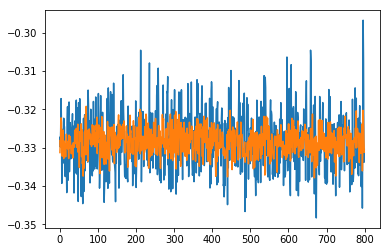

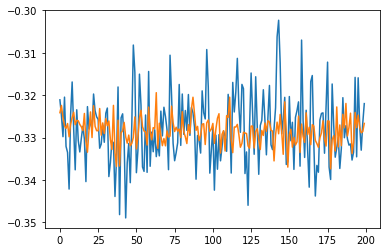

In [313]:
# Predict back ports average using all front and side ports
data_3 = data_runs[0]
dropped_labels_3 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
training_X_3 = data_3.iloc[:800, :].drop(labels=dropped_labels_3, axis='columns')
training_y_3 = data_3.iloc[:800, :].loc[:, 'BF1':'BF16'].mean(axis='columns')
testing_X_3 = data_3.iloc[800:, :].drop(labels=dropped_labels_3, axis='columns')
testing_y_3 = data_3.iloc[800:, :].loc[:, 'BF1':'BF16'].mean(axis='columns')
model.fit(training_X_3, training_y_3)
print(model.score(training_X_3, training_y_3))
print(model.score(testing_X_3, testing_y_3))

plt.plot(np.arange(800), training_y_3)
prediction = model.predict(training_X_3)
plt.plot(np.arange(800), prediction)
plt.show()

plt.plot(np.arange(200), testing_y_3)
prediction = model.predict(testing_X_3)
plt.plot(np.arange(200), prediction)
plt.show()

In [278]:
# Predict every 5th BF6 sample using prev 5 front and side port samples

# data_4 = data_runs[0]
data_4 = data_runs_concat
dropped_labels_4 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
X_4 = data_4.drop(labels=dropped_labels_4, axis='columns')
y_4 = data_4.loc[:, 'BF6']

X_4, y_4 = preprocessing.merge_rows(X_4, y_4, 5)

X_y_4 = pd.concat([X_4, y_4], axis='columns', ignore_index=True)
X_y_4 = X_y_4.sample(frac=1).reset_index(drop=True)
X_4 = X_y_4.iloc[:, 0:-1]
y_4 = X_y_4.iloc[:, -1:]

training_X_4 = X_4.iloc[:3200, :]
training_y_4 = y_4.iloc[:3200, :]
# training_X_4, training_y_4 = preprocessing.shuffle_rows(training_X_4, training_y_4)
testing_X_4 = X_4.iloc[3200:, :]
testing_y_4 = y_4.iloc[3200:, :]
model.fit(training_X_4, training_y_4)
print(model.score(training_X_4, training_y_4))
print(model.score(testing_X_4, testing_y_4))
print(X_4.shape)

0.8081909858078743
0.7804072530277837
(3400, 115)


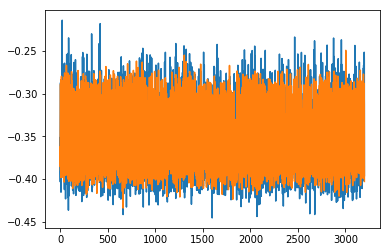

In [279]:
plt.plot(np.arange(training_y_4.size), training_y_4)
prediction = model.predict(training_X_4)
plt.plot(np.arange(prediction.size), prediction)
plt.show()

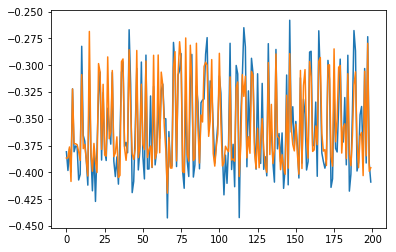

In [280]:
plt.plot(np.arange(testing_y_4.size), testing_y_4)
prediction = model.predict(testing_X_4)
plt.plot(np.arange(prediction.size), prediction)
plt.show()

Training score: 0.009351366489139479
Testing score: -0.10323769808456218


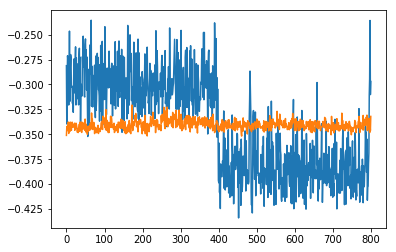

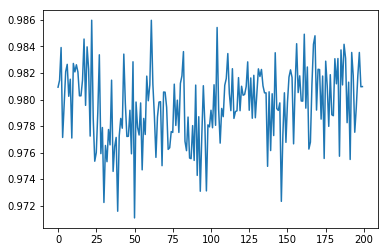

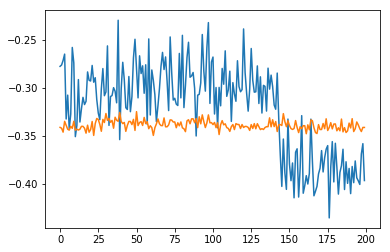

In [347]:
# Predict BF6 using all front ports
dropped_labels = ['NC2', 'NC3', 'NC4', 'NC5', 'BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16', 'SL1', 'SL2', 'SL3', 'SL4', 'SR1', 'SR2', 'SR3', 'SR4', 'SL5', 'SL6', 'SL7', 'SL8', 'SL9', 'SR5', 'SR6', 'SR7', 'SR8', 'SR9']
linear_regression(data=data_runs[0], dropped_labels=dropped_labels)

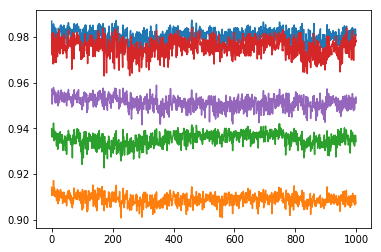

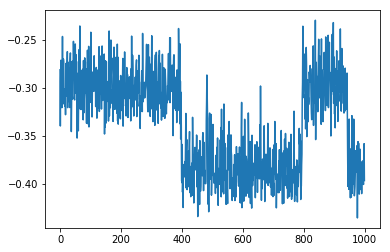

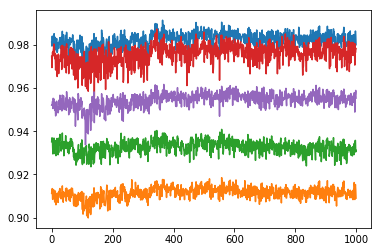

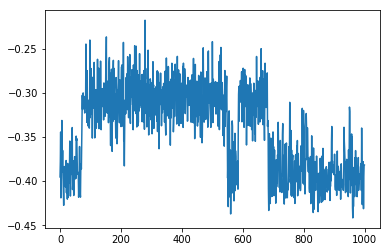

In [336]:
plt.plot(data_runs[0].loc[:, 'NC1':'NC5'])
plt.show()
plt.plot(data_runs[0].loc[:, 'BF6'])
plt.show()
plt.plot(data_runs[1].loc[:, 'NC1':'NC5'].iloc[0:1000])
plt.show()
plt.plot(data_runs[1].loc[:, 'BF6'].iloc[0:1000])
plt.show()